In [1]:
# import packages we need for exploratory data analysis (EDA)
import pandas as pd  # to store tabular data
import numpy as np  # to do some math
import matplotlib.pyplot as plt  # a popular data visualization tool
import seaborn as sns  # another popular data visualization tool
%matplotlib inline  
plt.style.use('fivethirtyeight')  # a popular data visualization theme

In [2]:
pima = pd.read_csv('../data/pima.data')

In [3]:
pima.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
# https://machinelearningmastery.com/handle-missing-data-python/
pima_column_names = ['times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness', 'serum_insulin', 'bmi', 'pedigree_function', 'age', 'onset_diabetes']

In [5]:
pima = pd.read_csv('../data/pima.data', names=pima_column_names)

In [6]:
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


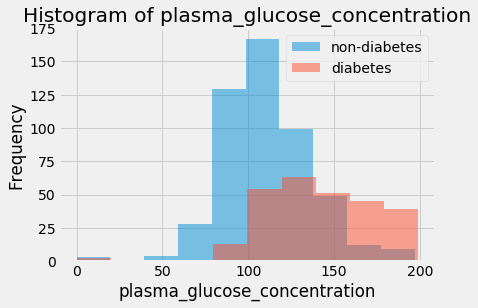

In [7]:
# get a histogram of the plasma_glucose_concentration column for
# both classes

col = 'plasma_glucose_concentration'
plt.hist(pima[pima['onset_diabetes']==0][col], 10, alpha=0.5, label='non-diabetes')
plt.hist(pima[pima['onset_diabetes']==1][col], 10, alpha=0.5, label='diabetes')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(col))
plt.show()

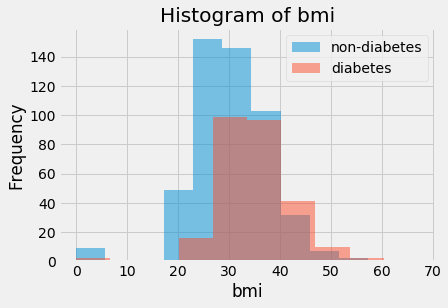

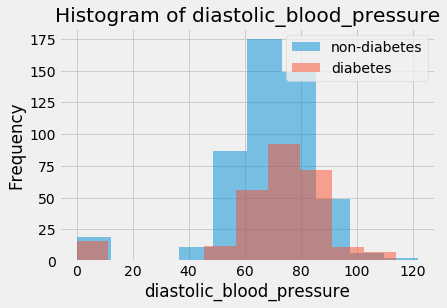

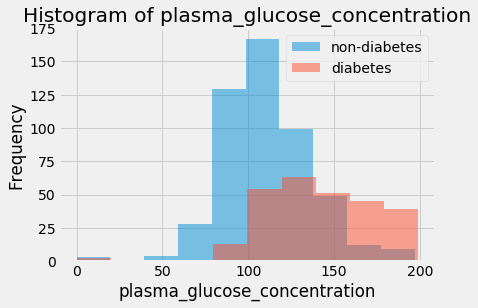

In [8]:
for col in ['bmi', 'diastolic_blood_pressure', 'plasma_glucose_concentration']:
    plt.hist(pima[pima['onset_diabetes']==0][col], 10, alpha=0.5, label='non-diabetes')
    plt.hist(pima[pima['onset_diabetes']==1][col], 10, alpha=0.5, label='diabetes')
    plt.legend(loc='upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(col))
    plt.show()

In [9]:
pima.corr()['onset_diabetes'] # numerical correlation matrix
# plasma_glucose_concentration definitely seems to be an interesting feature here

times_pregnant                  0.221898
plasma_glucose_concentration    0.466581
diastolic_blood_pressure        0.065068
triceps_thickness               0.074752
serum_insulin                   0.130548
bmi                             0.292695
pedigree_function               0.173844
age                             0.238356
onset_diabetes                  1.000000
Name: onset_diabetes, dtype: float64

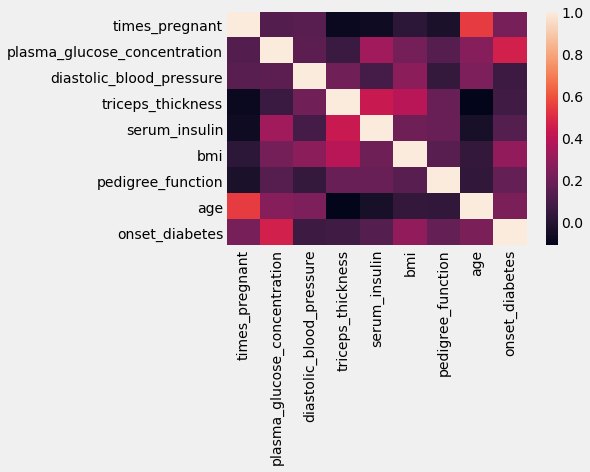

In [10]:
# look at the heatmap of the correlation matrix of our dataset
sns.heatmap(pima.corr())

In [11]:
pima.shape

(768, 9)

In [12]:
pima.isnull().sum()  
# oh good, we have no missing values, let's do some more EDA

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [13]:
pima['onset_diabetes'].value_counts(normalize=True) 
# get null accuracy, 65% did not develop diabetes

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

In [14]:
pima.describe()  # get some basic descriptive statistics

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
# woah woah, notice that the min value of bmi is 0. That is physically impossible. 
# Perhaps 0 has been encoded as a missing value instead of None

In [16]:
# We see that a 0 appears as a min for 
# times_pregnant
# plasma_glucose_concentration
# diastolic_blood_pressure
# triceps_thickness
# serum_insulin
# bmi
# onset_diabetes

In [17]:
# because 0 is a class for onset_diabetes and 0 is a viable number for times_pregnant, we may conclude that 0
# is encoding missing values for 

# plasma_glucose_concentration
# diastolic_blood_pressure
# triceps_thickness
# serum_insulin
# bmi

In [18]:
# Let's replace the 0's in these columns with None so our fillna, and dropna functions may work properly
pima['serum_insulin'].isnull().sum()

0

In [19]:
pima['serum_insulin'] = pima['serum_insulin'].map(lambda x:x if x != 0 else None)
# manually replace all 0's with a None value

In [20]:
pima['serum_insulin'].isnull().sum()

374

In [21]:
# A little faster now for all columns

for col in ['serum_insulin', 'bmi', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness']:
    pima[col].replace([0], [None], inplace=True)

In [22]:
pima.isnull().sum()  # this makes more sense now!

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [23]:
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,NaN,33.6,0.627,50,1
1,1,85,66,29,NaN,26.6,0.351,31,0
2,8,183,64,None,NaN,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [24]:
pima.describe()  # doesn't include columns with missing values..

,times_pregnant,serum_insulin,pedigree_function,age,onset_diabetes
count,768.000000,394.000000,768.000000,768.000000,768.000000
mean,3.845052,155.548223,0.471876,33.240885,0.348958
std,3.369578,118.775855,0.331329,11.760232,0.476951
min,0.000000,14.000000,0.078000,21.000000,0.000000
25%,1.000000,76.250000,0.243750,24.000000,0.000000
50%,3.000000,125.000000,0.372500,29.000000,0.000000
75%,6.000000,190.000000,0.626250,41.000000,1.000000
max,17.000000,846.000000,2.420000,81.000000,1.000000


In [25]:
pima['plasma_glucose_concentration'].mean(), pima['plasma_glucose_concentration'].std()

(121.68676277850589, 30.53564107280403)

In [26]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [27]:
empty_plasma_index = pima[pima['plasma_glucose_concentration'].isnull()].index
pima.loc[empty_plasma_index]['plasma_glucose_concentration']

75     None
182    None
342    None
349    None
502    None
Name: plasma_glucose_concentration, dtype: object

In [28]:
pima['plasma_glucose_concentration'].fillna(pima['plasma_glucose_concentration'].mean(), inplace=True)
# fill the column's missing values with the mean of the rest of the column

In [29]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      0
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [30]:
pima.loc[empty_plasma_index]['plasma_glucose_concentration']

75     121.686763
182    121.686763
342    121.686763
349    121.686763
502    121.686763
Name: plasma_glucose_concentration, dtype: float64

In [31]:
from sklearn.preprocessing import Imputer
# http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [32]:
imputer = Imputer(strategy='mean')

In [33]:
pima_imputed = imputer.fit_transform(pima)

In [34]:
type(pima_imputed)  # comes out as an array

numpy.ndarray

In [35]:
pima_imputed = pd.DataFrame(pima_imputed, columns=pima_column_names)

In [36]:
pima_imputed.head()  # notice for example the triceps_thickness missing values were replaced with 29.15342

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [37]:
pima_imputed.loc[empty_plasma_index]['plasma_glucose_concentration']  
# same values as we obtained with fillna

75     121.686763
182    121.686763
342    121.686763
349    121.686763
502    121.686763
Name: plasma_glucose_concentration, dtype: float64

In [38]:
pima_imputed.isnull().sum()  # no missing values

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [39]:
# drop the rows with missing values
pima_dropped = pima.dropna()

In [40]:
print "retained {}% of rows".format(round(100*(pima.shape[0] - pima_dropped.shape[0])/float(pima.shape[0])))
# lost over half of the rows!

retained 49.0% of rows


In [41]:
# some EDA of the dataset before it was dropped and after

In [42]:
pima['onset_diabetes'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

In [43]:
pima_dropped['onset_diabetes'].value_counts(normalize=True)  # the split of trues and falses stay relatively the same

0    0.669211
1    0.330789
Name: onset_diabetes, dtype: float64

In [44]:
# the mean values of each column (excluding missing values)
pima.mean()

times_pregnant                    3.845052
plasma_glucose_concentration    121.686763
diastolic_blood_pressure         72.405184
triceps_thickness                29.153420
serum_insulin                   155.548223
bmi                              32.457464
pedigree_function                 0.471876
age                              33.240885
onset_diabetes                    0.348958
dtype: float64

In [45]:
# the mean values of each column (with missing values rows dropped)
pima_dropped.mean()

times_pregnant                    3.295165
plasma_glucose_concentration    122.625157
diastolic_blood_pressure         70.671756
triceps_thickness                29.122137
serum_insulin                   155.717557
bmi                              33.072519
pedigree_function                 0.522476
age                              30.839695
onset_diabetes                    0.330789
dtype: float64

In [46]:
# % change in means
(pima_dropped.mean() - pima.mean()) / pima.mean()

times_pregnant                 -0.143012
plasma_glucose_concentration    0.007712
diastolic_blood_pressure       -0.023941
triceps_thickness              -0.001073
serum_insulin                   0.001089
bmi                             0.018950
pedigree_function               0.107230
age                            -0.072236
onset_diabetes                 -0.052068
dtype: float64

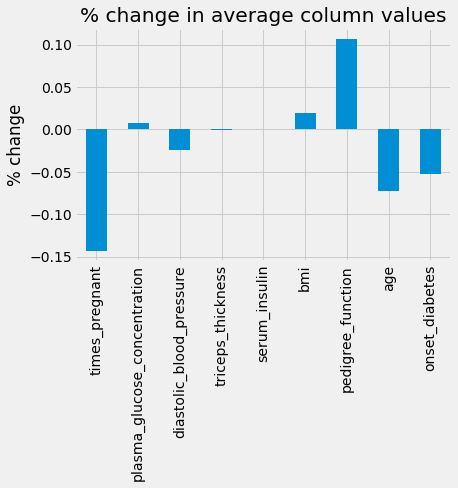

In [47]:
# % change in means as a bar chart
ax = ((pima_dropped.mean() - pima.mean()) / pima.mean()).plot(kind='bar', title='% change in average column values')
ax.set_ylabel('% change')

In [48]:
# the pedigree_fucntion average rose 11% after dropping missing values, which is a big increase!
# while the number of times pregnant dropped 14%

# we can see how dropping values severely affects the shape of the data and we should try to retain as much as possible

In [52]:
# now lets do some machine learning

# note we are using the dataset with the dropped rows

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

X_dropped = pima_dropped.drop('onset_diabetes', axis=1)
# create our feature matrix by removing the response variable
print "learning from {} rows".format(X_dropped.shape[0])
y_dropped = pima_dropped['onset_diabetes']


# our grid search variables and instances

# KNN parameters to try
knn_params = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, knn_params)
grid.fit(X_dropped, y_dropped)

print grid.best_score_, grid.best_params_
# but we are learning from way fewer rows..

learning from 393 rows
0.745547073791 {'n_neighbors': 7}


In [53]:
pima_zero = pima.fillna(0)  # impute values with 0

X_zero = pima_zero.drop('onset_diabetes', axis=1)
print "learning from {} rows".format(X_zero.shape[0])
y_zero = pima_zero['onset_diabetes']

knn_params = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7]}
grid = GridSearchCV(knn, knn_params)
grid.fit(X_zero, y_zero)

print grid.best_score_, grid.best_params_  
# if the values stayed at 0, our accuracy goes down

learning from 768 rows
0.733072916667 {'n_neighbors': 6}


In [54]:
from sklearn.model_selection import train_test_split

X = pima[['serum_insulin']].copy()
y = pima['onset_diabetes'].copy()

X.isnull().sum()

serum_insulin    374
dtype: int64

In [55]:
# the improper way.. imputing values BEFORE splitting
entire_data_set_mean = X.mean()
X = X.fillna(entire_data_set_mean)
print entire_data_set_mean

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

serum_insulin    155.548223
dtype: float64


In [56]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.65625

In [57]:
# the proper way.. imputing values AFTER splitting
from sklearn.model_selection import train_test_split

X = pima[['serum_insulin']].copy()
y = pima['onset_diabetes'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

X.isnull().sum()

serum_insulin    374
dtype: int64

In [58]:
training_mean = X_train.mean()
X_train = X_train.fillna(training_mean)
X_test = X_test.fillna(training_mean)

print training_mean  
# not the entire dataset's mean, it's much higher!!

serum_insulin    158.546053
dtype: float64


In [59]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

knn.score(X_test, y_test)
# lower accuracy, but much more honest in the mode's ability to generalize a pattern to outside data

0.48958333333333331

In [60]:
# TODO talk about how it is improper mathematically to impute the entire dataset and then go into machine learning
# it is better to set up a sklearn pipeline to do your steps

In [61]:
from sklearn.pipeline import Pipeline

In [62]:
knn_params = {'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}
# must redefine params to fit the pipeline

mean_impute = Pipeline([('imputer', Imputer(strategy='mean')), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute, knn_params)
grid.fit(X, y)

print grid.best_score_, grid.best_params_

0.731770833333 {'classify__n_neighbors': 6}


In [63]:
knn_params = {'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

median_impute = Pipeline([('imputer', Imputer(strategy='median')), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(median_impute, knn_params)
grid.fit(X, y)

print grid.best_score_, grid.best_params_

0.736979166667 {'classify__n_neighbors': 6}


In [64]:
# our accuracies may be lower, but they were made on more than twice the size of the dataset with missing values!
# they were still better than leaving them all at 0

In [65]:
impute = Imputer(strategy='mean')
# we will want to fill in missing values to see all 9 columns

pima_imputed_mean = pd.DataFrame(impute.fit_transform(pima), columns=pima_column_names)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cf75450>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10df47d50>]], dtype=object)

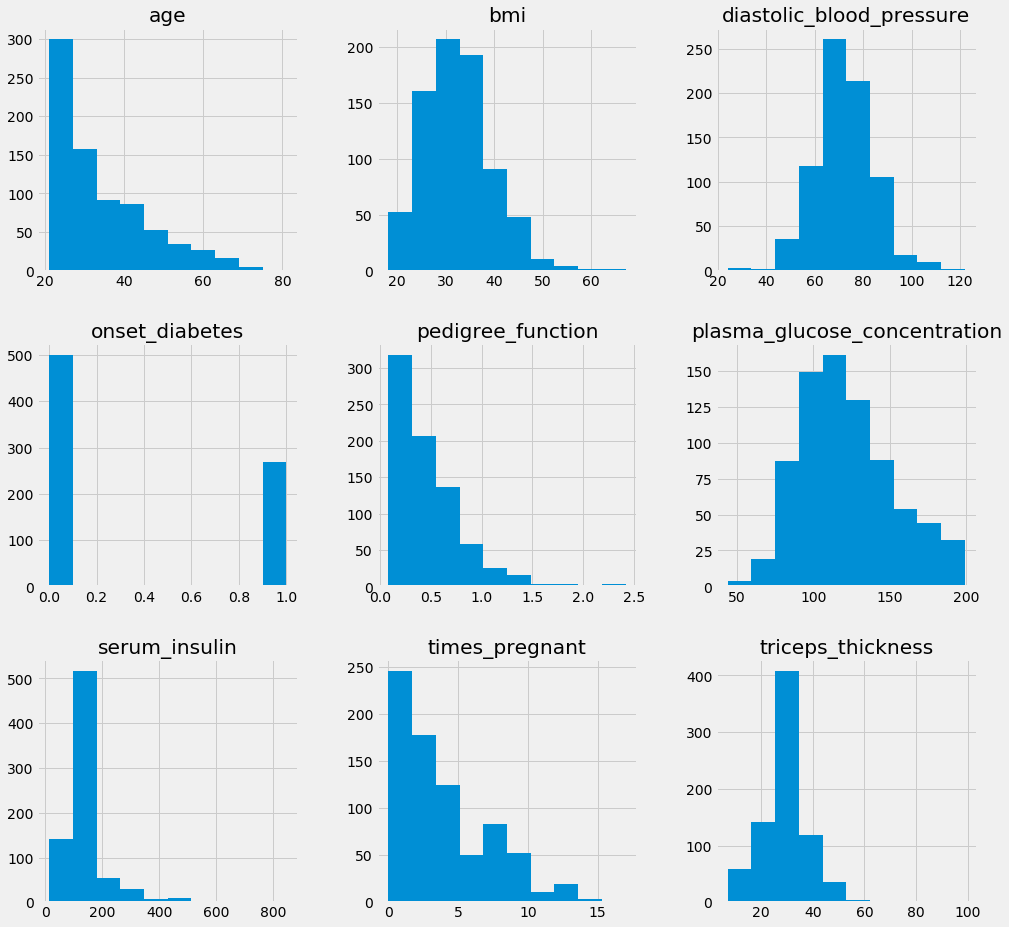

In [70]:
pima_imputed_mean.hist(figsize=(15, 15))

In [71]:
pima_imputed_mean.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110c04cd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11147d310>]], dtype=object)

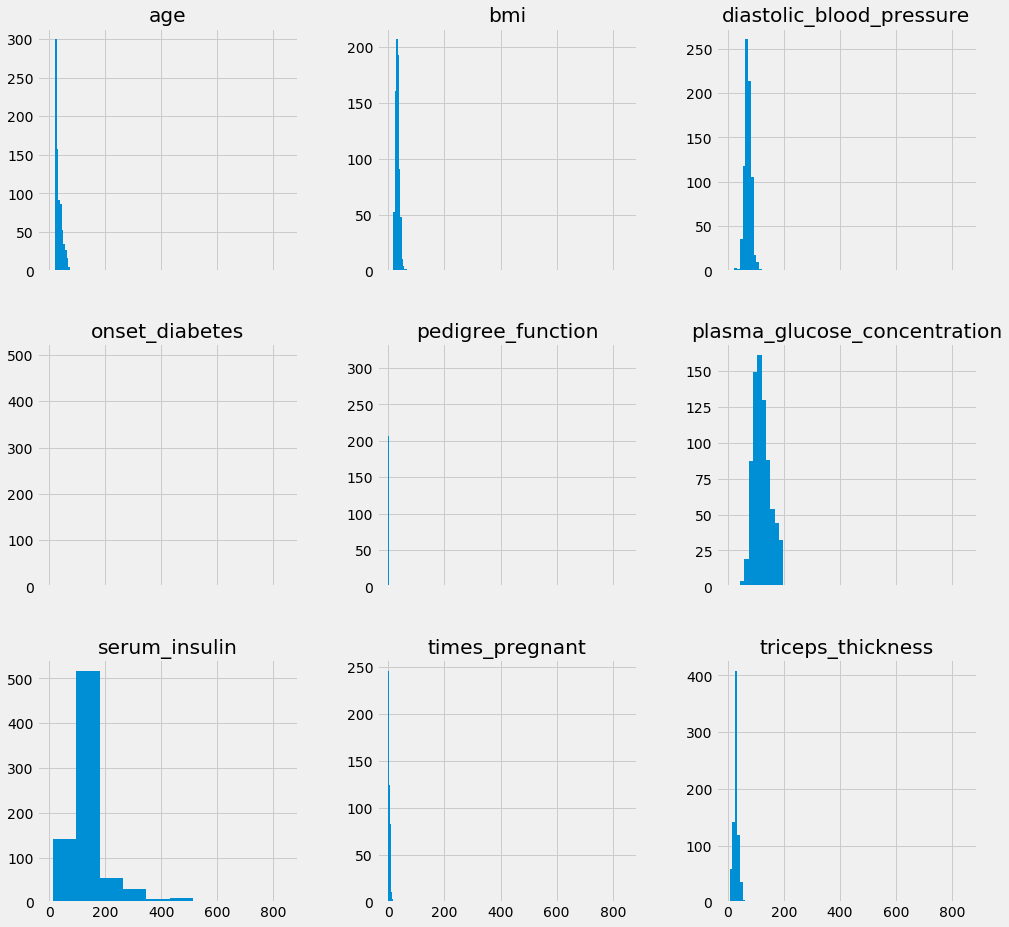

In [86]:
pima_imputed_mean.hist(figsize=(15, 15), sharex=True)
# with the same x axis (the y axis is not as important here)

In [ ]:
# TODO talk about standardization (column-based z-score normalization) vs normalization (row-based norm scaling)

# https://stackoverflow.com/questions/39120942/difference-between-standardscaler-and-normalizer-in-sklearn-preprocessing

# talk about how some models are affected by standardization

In [93]:
print pima['plasma_glucose_concentration'].head()

# get the mean of the column
mu = pima['plasma_glucose_concentration'].mean()

# get the standard deviation of the column
sigma = pima['plasma_glucose_concentration'].std()

# calculate z scores for every value in the column.
print ((pima['plasma_glucose_concentration'] - mu) / sigma).head()

0    148.0
1     85.0
2    183.0
3     89.0
4    137.0
Name: plasma_glucose_concentration, dtype: float64
0    0.864545
1   -1.205376
2    2.014501
3   -1.073952
4    0.503130
Name: plasma_glucose_concentration, dtype: float64


In [72]:
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler

In [73]:
# mean and std before z score standardizing
pima['plasma_glucose_concentration'].mean(), pima['plasma_glucose_concentration'].std()

(121.68676277850591, 30.435948867207657)

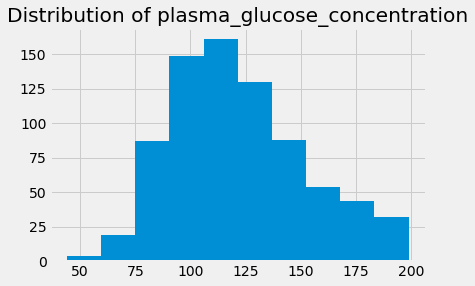

In [74]:
ax = pima['plasma_glucose_concentration'].hist()
ax.set_title('Distribution of plasma_glucose_concentration')

In [75]:
glucose_z_score_standardized = StandardScaler().fit_transform(pima[['plasma_glucose_concentration']])
# note we use the double bracket notation [[ ]] because the transformer requires a dataframe

# mean of 0 (floating point error) and standard deviation of 1
glucose_z_score_standardized.mean(), glucose_z_score_standardized.std()

(-3.5619655373390441e-16, 1.0)

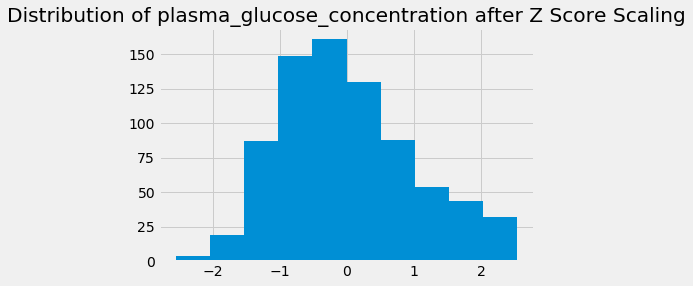

In [76]:
ax = pd.Series(glucose_z_score_standardized.reshape(-1,)).hist()
ax.set_title('Distribution of plasma_glucose_concentration after Z Score Scaling')

In [77]:
glucose_min_max_standardized = MinMaxScaler().fit_transform(pima[['plasma_glucose_concentration']])

# doesn't guarantee a mean or standard deviation
glucose_min_max_standardized.mean(), glucose_min_max_standardized.std()

(0.50120492115165094, 0.19623307962522193)

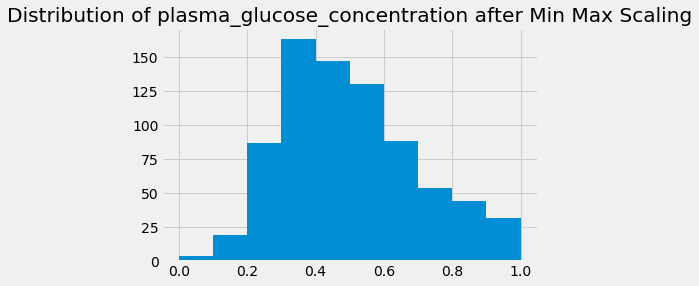

In [78]:
ax = pd.Series(glucose_min_max_standardized.reshape(-1,)).hist()
ax.set_title('Distribution of plasma_glucose_concentration after Min Max Scaling')

In [79]:
# notice the shape never changes, but the values do

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1115e4d50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11203c350>]], dtype=object)

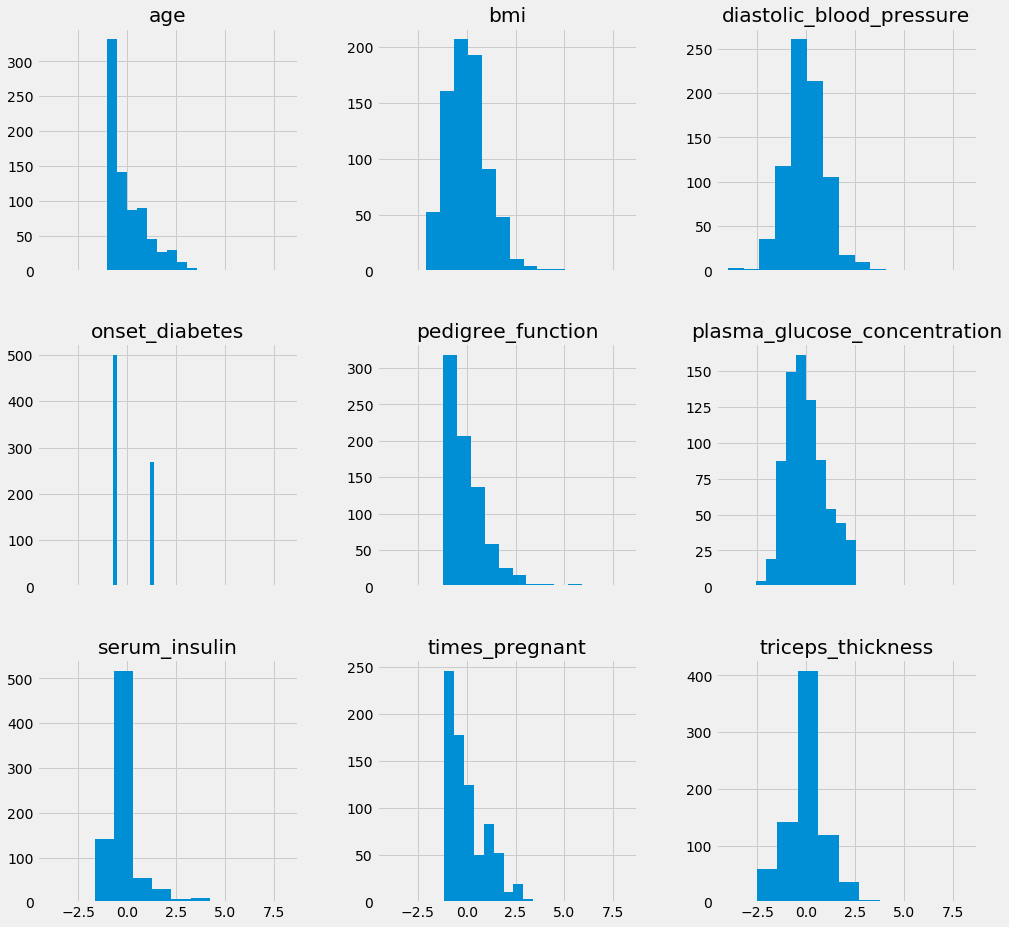

In [87]:
scale = StandardScaler()  # instantiate a z-scaler object

pima_imputed_mean_scaled = pd.DataFrame(scale.fit_transform(pima_imputed_mean), columns=pima_column_names)

pima_imputed_mean_scaled.hist(figsize=(15, 15), sharex=True)
# now all share the same "space"

In [ ]:
# like with the imputer, we must use pipelines to ensure that we aren't cheating and standardizing training data
# using knowledge from the testing data

In [96]:
knn_params = {'imputer__strategy':['mean', 'median'], 'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

mean_impute_standardize = Pipeline([('imputer', Imputer()), ('standardize', StandardScaler()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)

print grid.best_score_, grid.best_params_

0.7421875 {'imputer__strategy': 'median', 'classify__n_neighbors': 7}


In [100]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

pima_min_maxed = pd.DataFrame(min_max.fit_transform(pima_imputed), columns=pima_column_names)


In [101]:
pima_min_maxed.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501205,0.493930,0.240798,0.170130,0.291564,0.168179,0.204015,0.348958
std,0.198210,0.196361,0.123432,0.095554,0.102189,0.140596,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.129207,0.190184,0.070773,0.050000,0.000000
50%,0.176471,0.470968,0.491863,0.240798,0.170130,0.290389,0.125747,0.133333,0.000000
75%,0.352941,0.620968,0.571429,0.271739,0.170130,0.376278,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
knn_params = {'imputer__strategy': ['mean', 'median'], 'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

mean_impute_standardize = Pipeline([('imputer', Imputer()), ('standardize', MinMaxScaler()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)

print grid.best_score_, grid.best_params_
# woah woah woah, this is the best accuracy we've gotten so far working with missing data

0.74609375 {'imputer__strategy': 'mean', 'classify__n_neighbors': 4}


In [142]:
np.sqrt((pima_imputed**2).sum(axis=1)).mean()  
# average vector length of imputed matrix

223.36222025823744

In [116]:
from sklearn.preprocessing import Normalizer # our row normalizer

In [121]:
normalize = Normalizer()

pima_normalized = pd.DataFrame(normalize.fit_transform(pima_imputed), columns=pima_column_names)

In [143]:
np.sqrt((pima_normalized**2).sum(axis=1)).mean()
# average vector length of row normalized imputed matrix

1.0

In [103]:
knn_params = {'imputer__strategy': ['mean', 'median'], 'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

mean_impute_normalize = Pipeline([('imputer', Imputer()), ('normalize', Normalizer()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_normalize, knn_params)
grid.fit(X, y)

print grid.best_score_, grid.best_params_

0.682291666667 {'imputer__strategy': 'mean', 'classify__n_neighbors': 6}
